## Fake News or Not?
#### Ford St. John and Matthew Duc Nguyen
<img src="https://static01.nyt.com/images/2019/10/02/business/02TRUMPMEDIA-01/02TRUMPMEDIA-01-superJumbo.jpg" height=500 width=750>

Using the Kaggle dataset ![Fake News](https://www.kaggle.com/c/fake-news/data) we will attempt to train a machine learning model that can identify news articles as "reliable" or "unreliable" (e.g. fake) based on the following article attributes
1. id: a unique ID to identify the article
2. title: the title of the news article
3. author: the author of the news article
4. text: the content (actual text) of the news article; may or may not be incomplete

Articles are labeled with a boolean 1|0 indicator with 1 = "unreliable" and 0 = "reliable"

## Step 1: Exploratory data analysis
Before undertaking any model training, we want to get a feel for the data and identify features that we think might merit further exploration.  Our dataset has been pre-split for us into a training and testing set.  We'll use the training dataset to train our model, and use the testing dataset to test our model on data it's never seen before

In [37]:
# Imports needed to acquire and hold our data
import pandas as pd
import kaggle

# Import the data using the kaggle API - note you will be prompted for your Kaggle credentials in order to download the dataset
!kaggle competitions download -c fake-news

# Unzip the data and read it in as a Pandas DataFrame
from zipfile import ZipFile
with ZipFile('fake-news.zip', 'r') as zipobj:
    zipobj.extractall()
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv('submit.csv')

# Join the test and submit datasets together.  Submit contains the "true" classification for the articles present in the test dataset
test = pd.merge(test, submit)

fake-news.zip: Skipping, found more recently modified local copy (use --force to force download)


With our data loaded, we can now begin to explore our data.  We'll start by simply looking at the head of both datasets.  We'll then look at the relative number of "fake" news articles to reliable news articles and compare those rates in our training and testing datasets

In [34]:
# Let's look at the first few records of our data 
print(train.head(10))
print(test.head(10))

      id                                              title  \
0  20800  Specter of Trump Loosens Tongues, if Not Purse...   
1  20801  Russian warships ready to strike terrorists ne...   
2  20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3  20803  Tim Tebow Will Attempt Another Comeback, This ...   
4  20804                    Keiser Report: Meme Wars (E995)   
5  20805  Trump is USA's antique hero. Clinton will be n...   
6  20806  Pelosi Calls for FBI Investigation to Find Out...   
7  20807            Weekly Featured Profile – Randy Shannon   
8  20808  Urban Population Booms Will Make Climate Chang...   
9  20809                                                NaN   

                    author                                               text  
0         David Streitfeld  PALO ALTO, Calif.  —   After years of scorning...  
1                      NaN  Russian warships ready to strike terrorists ne...  
2            Common Dreams  Videos #NoDAPL: Native American Leader

Text(0, 0.5, 'Count')

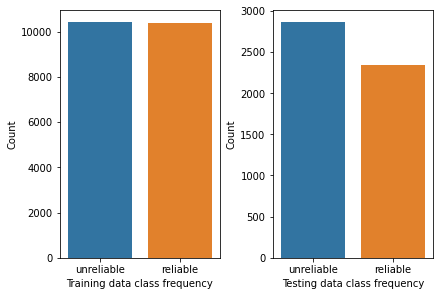

In [47]:
# Let's look at the relative rates of fake news to reliable news
# Import visualization packages
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Prepare training set data
train_counts = train['label'].value_counts()
train_counts.rename({0: 'reliable', 1: 'unreliable'}, inplace=True)
# Prepare testing set data
test_counts = test['label'].value_counts()
test_counts.rename({0: 'reliable', 1: 'unreliable'}, inplace=True)

# Plot it
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
#fig.tight_layout()
sns.barplot(x=train_counts.index, y=train_counts, ax=ax1)
ax1.set_xlabel('Training data class frequency')
ax1.set_ylabel('Count')
sns.barplot(x=test_counts.index, y=test_counts, ax=ax2)
ax2.set_xlabel('Testing data class frequency')
ax2.set_ylabel('Count')